In [635]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn import neighbors, svm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from itertools import product
from sklearn.metrics import accuracy_score, classification_report

In [636]:
dataset = load_wine()
X = dataset["data"][:,:2] # we get only the first two attributes of the dataset
y = dataset["target"] # we get the labels
feature_names = dataset["feature_names"][:2]

# Extra point: we consider two different features for a classification based on colors
#X = dataset["data"][:,9:11]
#feature_names = dataset["feature_names"][9:11]

In [637]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"The features are: {feature_names[0]} and {feature_names[1]}")

X: (178, 2)
y: (178,)
The features are: alcohol and malic_acid


In [638]:
# We randomly split the data into train, validation and test sets in proportion 5:2:3
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=2/7, stratify=y_train_valid)

In [639]:
print(f"X_train_valid: {X_train_valid.shape} y_train_valid: {y_train_valid.shape}")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape} y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape} y_test: {y_test.shape}")

X_train_valid: (124, 2) y_train_valid: (124,)
X_train: (88, 2) y_train: (88,)
X_valid: (36, 2) y_valid: (36,)
X_test: (54, 2) y_test: (54,)


In [640]:
# K-Nearest Neighbors

In [641]:
def plotKNN(classifiers, K):
    h = 0.02
    
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])
        
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1 # to create our limits in the graph
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1 # we increase the upper limit by 1 and we decrease the lower limit by 1 to not touch the axes
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # we create a co-ordinate matrix using co-ordinate vectors

    fig, ax = plt.subplots(2, 2, figsize=(10,8))

    for idx, clf, i in zip(product([0,1],[0,1]), classifiers, K):

        Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T) # .ravel() creates a flattened 1D array
        # then we concatenate the two vectors and we transpose the matrix

        Z = Z.reshape(xx.shape)
        
        ax[idx[0], idx[1]].pcolormesh(xx, yy, Z, cmap=cmap_light)
        ax[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor="k")
        
        ax[idx[0], idx[1]].set_xlabel(f"{feature_names[0]}")
        ax[idx[0], idx[1]].set_ylabel(f"{feature_names[1]}")
        
        ax[idx[0], idx[1]].set_title(f"Nearest Neighbors Classification with k = {i}")
        
        plt.tight_layout()
        
    plt.show()

In [642]:
K = [1, 3, 5, 7]
classifiers_KNN = []

# we apply K-Nearest Neighbors and fit on the training set
for k in K:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    classifiers_KNN.append(clf)

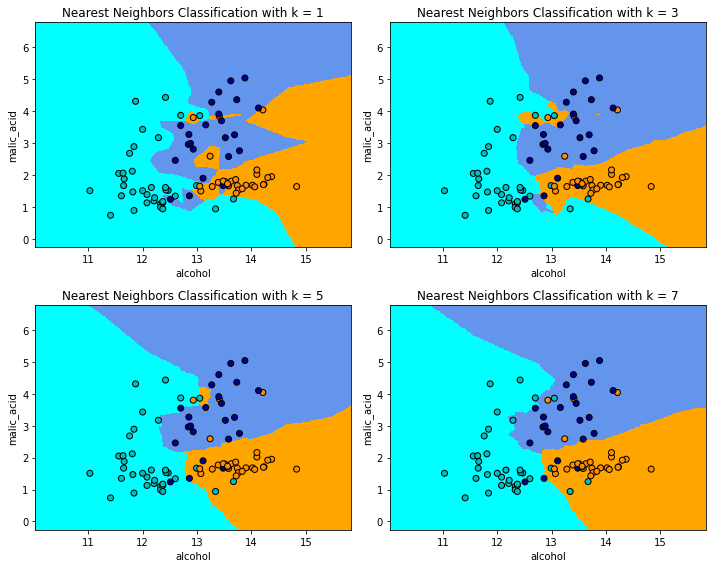

In [643]:
# we plot the data and the decision boundaries
plotKNN(classifiers_KNN, K)

In [644]:
accuracies_KNN = []

# we evaluate the method on the validation set
for clf, k in zip(classifiers_KNN, K):
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    accuracies_KNN.append(acc)
    print(f"K-Nearest Neighbors Classification with k = {k}")
    print(classification_report(y_valid, y_pred))
    print()

K-Nearest Neighbors Classification with k = 1
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.80      0.86      0.83        14
           2       0.60      0.60      0.60        10

    accuracy                           0.78        36
   macro avg       0.77      0.76      0.77        36
weighted avg       0.78      0.78      0.78        36


K-Nearest Neighbors Classification with k = 3
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.92      0.79      0.85        14
           2       0.67      0.80      0.73        10

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.80        36
weighted avg       0.82      0.81      0.81        36


K-Nearest Neighbors Classification with k = 5
              precision    recall  f1-score   support

           0       0.90      0.75      0.82

In [690]:
def plotAccuraciesKNN(accuracies):
    x = range(1,8,2)
    y = accuracies
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x, y, marker="o")
    plt.xlim(0,8)
    plt.ylim(0.49,1)
    plt.grid(axis="y")
    plt.xlabel("Tested values of k")
    plt.ylabel("Accuracy")
    plt.title("Accuracy on Validation")
    
    plt.show()

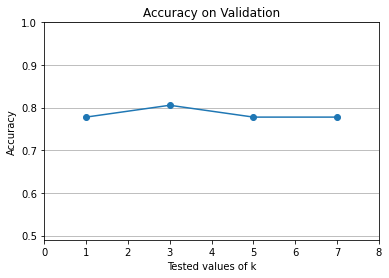

In [691]:
# we plot the accuracies on the validation set when k varies
plotAccuraciesKNN(accuracies_KNN)

In [647]:
# we choose the best value of k by considering the highest accuracy
for i, acc, k in zip(range(4), accuracies_KNN, range(1,8,2)):
    if i == 0:
        max_acc = accuracies_KNN[i]
        best_k = k
    
    if max_acc <= accuracies_KNN[i]: 
        max_acc = accuracies_KNN[i]
        best_k = k

In [648]:
print(f"By using the best value of k (k = {best_k}), we obtain an accuracy of {max_acc:.2f}")

By using the best value of k (k = 3), we obtain an accuracy of 0.81


In [649]:
# we evaluate the model on the test set using best_k
best_clf_KNN = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_clf_KNN.fit(X_train_valid, y_train_valid)
y_pred_KNN = best_clf_KNN.predict(X_test)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

In [650]:
print(f"After evaluating the model on the test set we obtain an accuracy of {acc_KNN:.2f}")

After evaluating the model on the test set we obtain an accuracy of 0.74


In [651]:
# Linear SVM

In [652]:
def plotSVC(classifiers, C, linear):
    h = 0.02
    
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])
        
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1 
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    fig, ax = plt.subplots(2, 4, figsize=(16,10))
    ax[1, 3] = plt.axis("off")

    for idx, clf, c in zip(product([0,1],[0,1,2,3]), classifiers, C):

        Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)

        Z = Z.reshape(xx.shape)
        
        ax[idx[0], idx[1]].pcolormesh(xx, yy, Z, cmap=cmap_light)
        ax[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor="k")
        
        ax[idx[0], idx[1]].set_xlabel(f"{feature_names[0]}")
        ax[idx[0], idx[1]].set_ylabel(f"{feature_names[1]}")
        
        if linear == True:
            ax[idx[0], idx[1]].set_title(f"Linear SVM Classification with C = {c}")
        else:
            ax[idx[0], idx[1]].set_title(f"RBF Kernel Classification with C = {c}")
        
        plt.tight_layout()
    
    
    plt.show()

In [653]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
classifiers_linear_SVM = []

# we apply linear SVM and fit on the training set
for c in C:
    clf = svm.SVC(C=c, kernel="linear")
    clf.fit(X_train, y_train)
    classifiers_linear_SVM.append(clf)

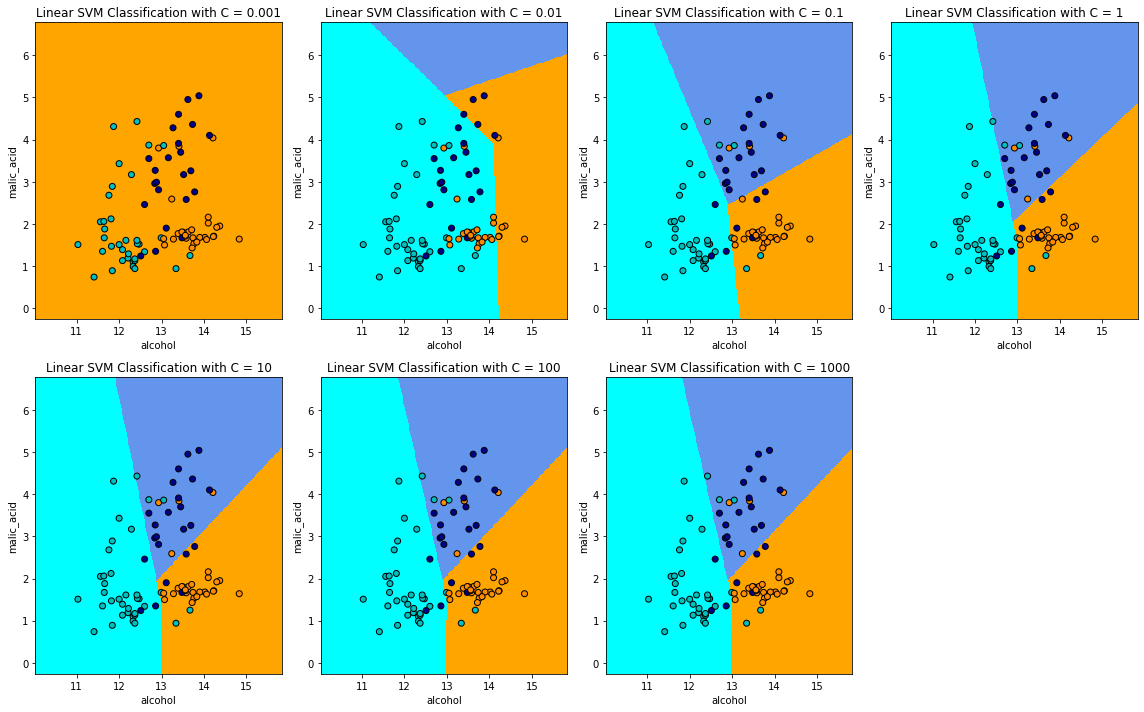

In [654]:
# we plot the data and the decision boundaries
plotSVC(classifiers_linear_SVM, C, linear=True)

In [655]:
accuracies_linear_SVM = []

# we evaluate the method on the validation set
for clf, c in zip(classifiers_linear_SVM, C):
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    accuracies_linear_SVM.append(acc)
    print(f"Linear SVM Classification with C = {c}")
    print(f"Accuracy: {acc:.2f}")
    #print(classification_report(y_valid, y_pred))
    print()

Linear SVM Classification with C = 0.001
Accuracy: 0.39

Linear SVM Classification with C = 0.01
Accuracy: 0.53

Linear SVM Classification with C = 0.1
Accuracy: 0.81

Linear SVM Classification with C = 1
Accuracy: 0.78

Linear SVM Classification with C = 10
Accuracy: 0.78

Linear SVM Classification with C = 100
Accuracy: 0.78

Linear SVM Classification with C = 1000
Accuracy: 0.78



In [692]:
def plotAccuraciesSVC(accuracies):
    C_stringhe = [str(c) for c in C]
    x = C_stringhe
    y = accuracies
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x, y, marker="o")
    
    plt.ylim(-0.01,1)
    plt.xlabel("Tested values of C")
    plt.ylabel("Accuracy")
    #plt.legend("Score")
    plt.grid(axis="y")
    plt.title("Accuracy on Validation")
    
    #for spine in plt.gca().spines.values():
    #    spine.set_visible(False)
    
    plt.show()

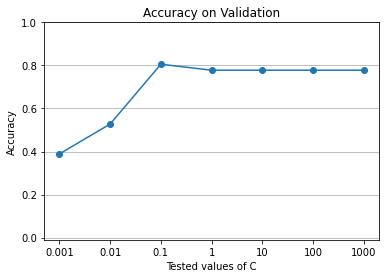

In [693]:
# we plot the accuracies on the validation set when C varies
plotAccuraciesSVC(accuracies_linear_SVM)

In [658]:
def getMaxAccuracy(accuracies, C):
    for i, acc, c in zip(range(len(C)), accuracies, C):
        if i == 0:
            max_acc = accuracies[i]
            best_c = c
        if max_acc < accuracies[i]: #If more than one C gives the same accuracy, we choose the lowest C because it gives the larger margin
            max_acc = accuracies[i]
            best_c = c
    return best_c, max_acc

In [659]:
best_c, max_acc_linear_SVM = getMaxAccuracy(accuracies_linear_SVM, C)
print(f"By using the best value of C (C = {best_c}), we obtain an accuracy of {max_acc_linear_SVM:.2f}")

By using the best value of C (C = 0.1), we obtain an accuracy of 0.81


In [660]:
# we evaluate the model on the test set using best_c
best_clf_linear_SVM = svm.SVC(C=best_c, kernel="linear")
best_clf_linear_SVM.fit(X_train_valid, y_train_valid)
y_pred_linear_SVM = best_clf_linear_SVM.predict(X_test)
acc_linear_SVM = accuracy_score(y_test, y_pred_linear_SVM)

In [661]:
print(f"After evaluating the model on the test set we obtain an accuracy of {acc_linear_SVM:.2f}")

After evaluating the model on the test set we obtain an accuracy of 0.76


In [662]:
# RBF Kernel

In [663]:
classifiers_RBF = []

# we apply RBF kernel and fit on the training set
for c in C:
    clf = svm.SVC(C=c, kernel="rbf")
    clf.fit(X_train, y_train)
    classifiers_RBF.append(clf)

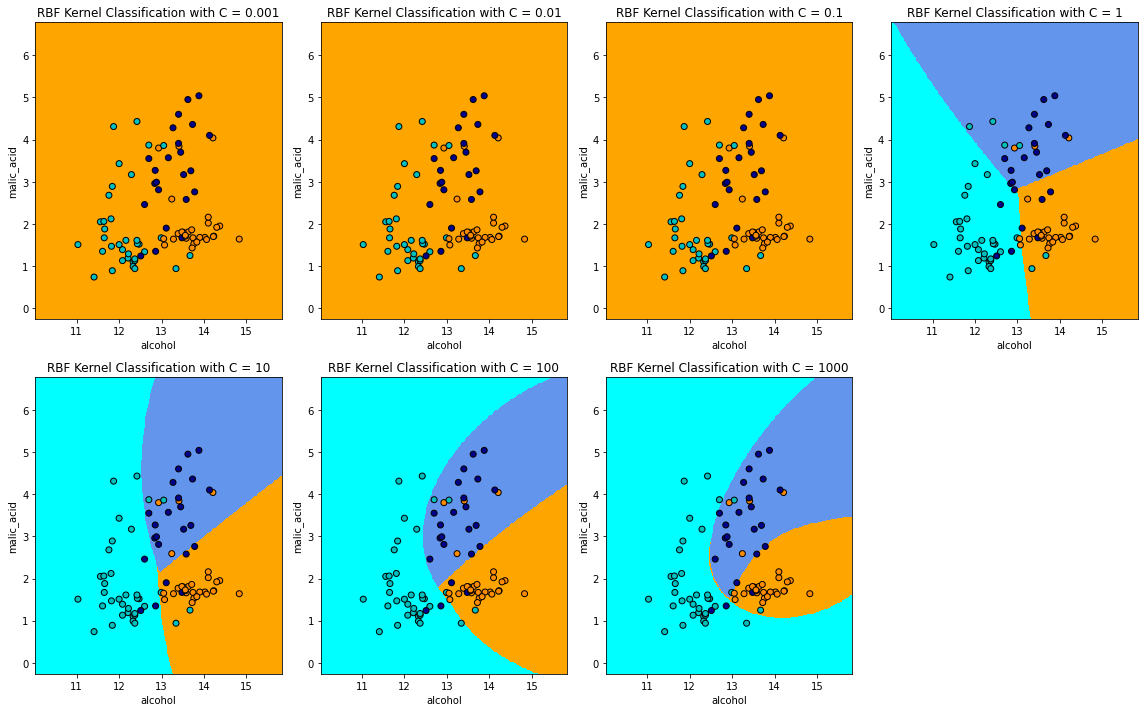

In [664]:
# we plot the data and the decision boundaries
plotSVC(classifiers_RBF, C, linear=False)

In [665]:
accuracies_RBF = []

# we evaluate the method on the validation set
for clf, c in zip(classifiers_RBF, C):
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    accuracies_RBF.append(acc)
    print(f"RBF Kernel Classification with C = {c}")
    print(f"Accuracy: {acc:.2f}")
    #print(classification_report(y_valid, y_pred))
    print()

RBF Kernel Classification with C = 0.001
Accuracy: 0.39

RBF Kernel Classification with C = 0.01
Accuracy: 0.39

RBF Kernel Classification with C = 0.1
Accuracy: 0.39

RBF Kernel Classification with C = 1
Accuracy: 0.78

RBF Kernel Classification with C = 10
Accuracy: 0.78

RBF Kernel Classification with C = 100
Accuracy: 0.72

RBF Kernel Classification with C = 1000
Accuracy: 0.67



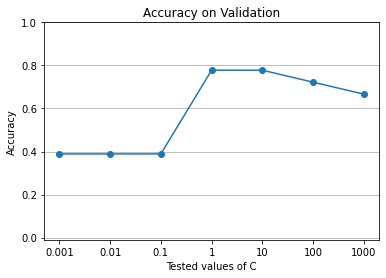

In [694]:
# we plot the accuracies on the validation set when C varies
plotAccuraciesSVC(accuracies_RBF)

In [667]:
best_c_RBF, max_acc_RBF = getMaxAccuracy(accuracies_RBF, C)
print(f"By using the best value of C (C = {best_c_RBF}), we obtain an accuracy of {max_acc_RBF:.2f}")

By using the best value of C (C = 1), we obtain an accuracy of 0.78


In [668]:
# we evaluate the model on the test set using best_c
best_clf_RBF = svm.SVC(C=best_c_RBF, kernel="rbf")
best_clf_RBF.fit(X_train_valid, y_train_valid)
y_pred_RBF = best_clf_RBF.predict(X_test)
acc_RBF = accuracy_score(y_test, y_pred_RBF)

In [669]:
print(f"After evaluating the model on the test set we obtain an accuracy of {acc_RBF:.2f}")

After evaluating the model on the test set we obtain an accuracy of 0.74


In [670]:
# Grid Search with C and gamma

In [671]:
# we choose the following values for C and gamma
C1 = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]

params_grid = {
    "C": C1,
    "gamma": gamma
}

classifiers_grid = []
for p in ParameterGrid(params_grid):
    clf_grid = svm.SVC(C=p["C"], gamma=p["gamma"], kernel="rbf")
    clf_grid.fit(X_train, y_train)
    classifiers_grid.append(clf_grid)    

In [672]:
accuracies_grid = []

# we train and score the model on validation set
for clf, p in zip(classifiers_grid, ParameterGrid(params_grid)):
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    accuracies_grid.append(acc)
    print(f"RBF Kernel Classification with C = {p['C']} and gamma = {p['gamma']}")
    print(f"Accuracy: {acc:.2f}")
    #print(classification_report(y_valid, y_pred))
    print()

RBF Kernel Classification with C = 0.01 and gamma = 0.01
Accuracy: 0.39

RBF Kernel Classification with C = 0.01 and gamma = 0.1
Accuracy: 0.39

RBF Kernel Classification with C = 0.01 and gamma = 1
Accuracy: 0.39

RBF Kernel Classification with C = 0.01 and gamma = 10
Accuracy: 0.39

RBF Kernel Classification with C = 0.01 and gamma = 100
Accuracy: 0.39

RBF Kernel Classification with C = 0.1 and gamma = 0.01
Accuracy: 0.39

RBF Kernel Classification with C = 0.1 and gamma = 0.1
Accuracy: 0.69

RBF Kernel Classification with C = 0.1 and gamma = 1
Accuracy: 0.75

RBF Kernel Classification with C = 0.1 and gamma = 10
Accuracy: 0.50

RBF Kernel Classification with C = 0.1 and gamma = 100
Accuracy: 0.39

RBF Kernel Classification with C = 1 and gamma = 0.01
Accuracy: 0.75

RBF Kernel Classification with C = 1 and gamma = 0.1
Accuracy: 0.81

RBF Kernel Classification with C = 1 and gamma = 1
Accuracy: 0.81

RBF Kernel Classification with C = 1 and gamma = 10
Accuracy: 0.69

RBF Kernel Clas

In [673]:
def getMaxAccuracy_C_gamma(accuracies, params_grid):
    for i, acc, p in zip(range(len(accuracies)), accuracies, ParameterGrid(params_grid)):
        if i == 0:
            max_acc = accuracies[i]
            best_c = p["C"]
            best_gamma = p["gamma"]
        if max_acc < accuracies[i]: #If more than one C gives the same accuracy, we choose the lowest C because it gives the larger margin
            max_acc = accuracies[i]
            best_c = p["C"]
            best_gamma = p["gamma"]
    return best_c, best_gamma, max_acc

In [674]:
# we choose the best parameters
best_c_grid, best_gamma_grid, max_acc_grid = getMaxAccuracy_C_gamma(accuracies_grid, params_grid)

In [675]:
print(f"By using the best values of C (C = {best_c_grid}) and gamma (gamma = {best_gamma_grid}), we obtain an accuracy of {max_acc_grid:.2f}")

By using the best values of C (C = 100) and gamma (gamma = 0.01), we obtain an accuracy of 0.83


In [676]:
# we evaluate the model on the test set using best_c and best_gamma
best_clf_grid = svm.SVC(C=best_c_grid, gamma=best_gamma_grid, kernel="rbf")
best_clf_grid.fit(X_train_valid, y_train_valid)
y_pred_grid = best_clf_grid.predict(X_test)
acc_grid = accuracy_score(y_test, y_pred_grid)

In [677]:
print(f"After evaluating the model on the test set we obtain an accuracy of {acc_grid:.2f}")

After evaluating the model on the test set we obtain an accuracy of 0.80


In [678]:
def plotSVC_C_gamma(best_clf, best_c, best_gamma):
    h = 0.02
    
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])
        
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1 # to create our limits in the graph
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1 # we increase the upper limit by 1 and we decrease the lower limit by 1 to not touch the axes
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # we create a co-ordinate matrix using co-ordinate vectors

    fig, ax = plt.subplots(figsize=(8,6))

    Z = best_clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
    
    Z = Z.reshape(xx.shape)
        
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X_train_valid[:, 0], X_train_valid[:, 1], c=y_train_valid, cmap=cmap_bold, edgecolor="k")
    
    ax.set_xlabel(f"{feature_names[0]}")
    ax.set_ylabel(f"{feature_names[1]}")
    
    ax.set_title(f"RBF Kernel Classification with C = {best_c} and gamma = {best_gamma}")
    
    plt.show()

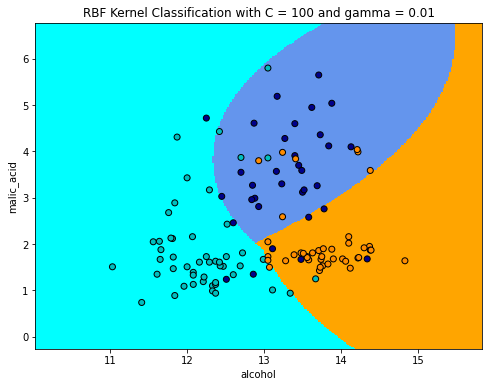

In [679]:
# we plot the decision boundaries
plotSVC_C_gamma(best_clf_grid, best_c_grid, best_gamma_grid)

In [683]:
# K-Fold

In [684]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

accuracies_Kfold = []
for p in ParameterGrid(params_grid):
    acc = []
    accuracy = []
    for train_indices, valid_indices in kfold.split(X_train_valid, y_train_valid): # for each iteration
        # Prepare splits
        X_train = X_train_valid[train_indices] # I get only the rows that belong to the training set
        y_train = y_train_valid[train_indices]
        X_valid = X_train_valid[valid_indices]
        y_valid = y_train_valid[valid_indices]

        # Train and evaluate

        clf = svm.SVC(C=p["C"], gamma=p["gamma"], kernel="rbf")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)

        # Compute macro average f1
        a1 = accuracy_score(y_valid, y_pred)
        #acc = a1.mean() # it is the mean of f1 for each class
        print(a1)
        acc.append(a1)
        
    acc = np.array(acc)
    accuracy = np.mean(acc)
    accuracies_Kfold.append(accuracy)
    print(f"Final accuracy = {accuracy:.2f} with C = {p['C']} and gamma = {p['gamma']}")

0.4
0.52
0.44
0.32
0.3333333333333333
Final accuracy = 0.40 with C = 0.01 and gamma = 0.01
0.32
0.32
0.52
0.4
0.4583333333333333
Final accuracy = 0.40 with C = 0.01 and gamma = 0.1
0.48
0.32
0.4
0.4
0.4166666666666667
Final accuracy = 0.40 with C = 0.01 and gamma = 1
0.48
0.36
0.44
0.44
0.2916666666666667
Final accuracy = 0.40 with C = 0.01 and gamma = 10
0.52
0.32
0.48
0.24
0.4583333333333333
Final accuracy = 0.40 with C = 0.01 and gamma = 100
0.48
0.56
0.36
0.28
0.3333333333333333
Final accuracy = 0.40 with C = 0.1 and gamma = 0.01
0.44
0.8
0.76
0.64
0.75
Final accuracy = 0.68 with C = 0.1 and gamma = 0.1
0.68
0.8
0.92
0.72
0.875
Final accuracy = 0.80 with C = 0.1 and gamma = 1
0.48
0.6
0.72
0.64
0.25
Final accuracy = 0.54 with C = 0.1 and gamma = 10
0.44
0.4
0.4
0.36
0.4166666666666667
Final accuracy = 0.40 with C = 0.1 and gamma = 100
0.64
0.72
0.8
0.76
0.75
Final accuracy = 0.73 with C = 1 and gamma = 0.01
0.76
0.88
0.76
0.88
0.75
Final accuracy = 0.81 with C = 1 and gamma = 0.1
0

In [685]:
# we choose the best parameters
best_c_Kfold, best_gamma_Kfold, max_acc_Kfold = getMaxAccuracy_C_gamma(accuracies_Kfold, params_grid)

In [686]:
print(f"By using the best values of C (C = {best_c_Kfold}) and gamma (gamma = {best_gamma_Kfold}), we obtain an accuracy of {max_acc_Kfold:.2f}")

By using the best values of C (C = 10) and gamma (gamma = 0.1), we obtain an accuracy of 0.82


In [687]:
# we evaluate the model on the test set using best_c and best_gamma
best_clf_Kfold = svm.SVC(C=best_c_Kfold, gamma=best_gamma_Kfold, kernel="rbf")
best_clf_Kfold.fit(X_train_valid, y_train_valid)
y_pred_Kfold = best_clf_Kfold.predict(X_test)
acc_Kfold = accuracy_score(y_test, y_pred_Kfold)

In [688]:
print(f"After evaluating the model on the test set we obtain an accuracy of {acc_Kfold:.2f}")

After evaluating the model on the test set we obtain an accuracy of 0.80


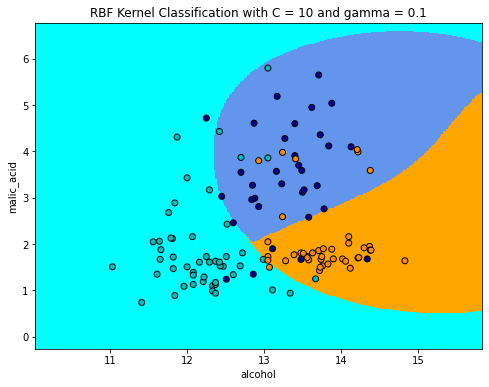

In [689]:
plotSVC_C_gamma(best_clf_Kfold, best_c_Kfold, best_gamma_Kfold)